# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [8]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [9]:
# Split data into train and test sets


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

Summary statistics of numerical features:


,Clothing ID,Age,Positive Feedback Count
count,18442.000000,18442.000000,18442.000000
mean,954.896757,43.383635,2.697484
std,141.571783,12.246264,5.942220
min,2.000000,18.000000,0.000000
25%,863.000000,34.000000,0.000000
50%,952.000000,41.000000,1.000000
75%,1078.000000,52.000000,3.000000
max,1205.000000,99.000000,122.000000



Distribution of target variable:
Recommended IND
1    0.816235
0    0.183765
Name: proportion, dtype: float64

Missing values in features:
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64


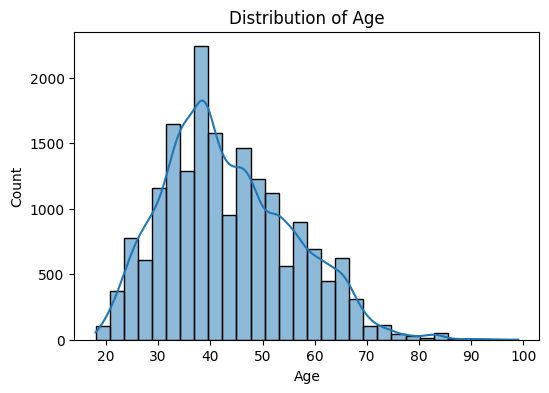

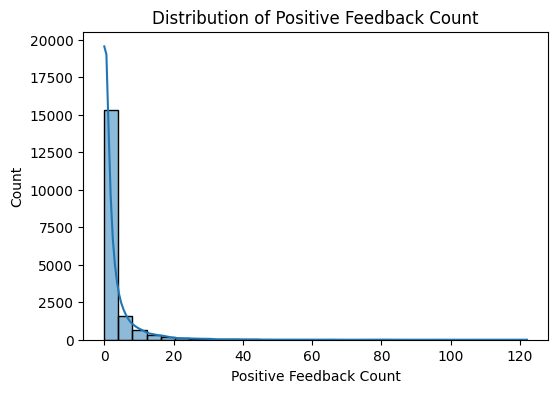

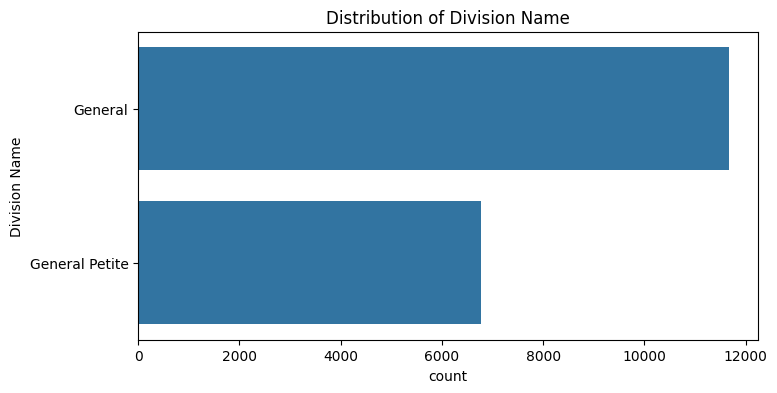

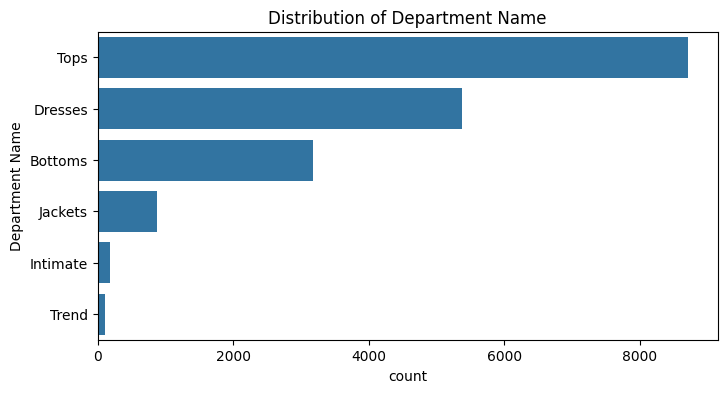

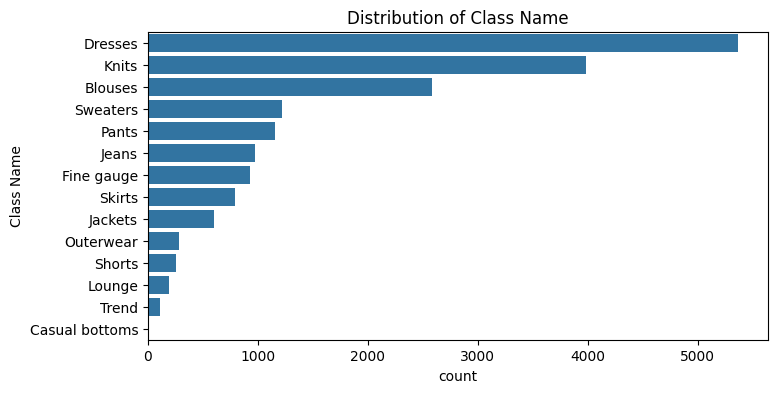

In [10]:


# Basic statistics of numerical features
print("Summary statistics of numerical features:")
display(X.describe())

# Distribution of target variable
print("\nDistribution of target variable:")
print(y.value_counts(normalize=True))

# Check for missing values
print("\nMissing values in features:")
print(X.isnull().sum())

# Visualize the distribution of numerical features
import matplotlib.pyplot as plt

numerical_features = ['Age', 'Positive Feedback Count']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(X[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Visualize the distribution of categorical features
categorical_features = ['Division Name', 'Department Name', 'Class Name']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=X, y=feature, order=X[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.show()

## Building Pipeline

In [11]:
# Define preprocessing for numerical, categorical, and text features
numerical_features = ['Age', 'Positive Feedback Count']
numerical_transformer = StandardScaler()

categorical_features = ['Division Name', 'Department Name', 'Class Name']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

text_features = 'Review Text'
text_transformer = TfidfVectorizer(max_features=500)

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, text_features),
    ],
    remainder='drop'
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=27))
])


In [12]:
# Modify the function to return counts of POS tags and entities
def extract_pos_ner_counts(text):
    doc = nlp(text)
    pos_counts = {token.pos_: 0 for token in doc}
    entity_counts = {ent.label_: 0 for ent in doc.ents}
    
    for token in doc:
        pos_counts[token.pos_] += 1
    for ent in doc.ents:
        entity_counts[ent.label_] += 1
    
    return {
        "pos_counts": pos_counts,
        "entity_counts": entity_counts
    }

In [13]:
# Apply the function to extract POS and entity counts
df['POS Counts'] = df['Review Text'].apply(lambda x: extract_pos_ner_counts(x)['pos_counts'])
df['Entity Counts'] = df['Review Text'].apply(lambda x: extract_pos_ner_counts(x)['entity_counts'])

NameError: name 'nlp' is not defined

In [ ]:
from sklearn.feature_extraction import DictVectorizer

# Define transformers for POS and entity counts
pos_transformer = Pipeline(steps=[
    ('vectorizer', DictVectorizer(sparse=False))
])

entity_transformer = Pipeline(steps=[
    ('vectorizer', DictVectorizer(sparse=False))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, text_features),
        ('pos', pos_transformer, 'POS Counts'),
        ('entity', entity_transformer, 'Entity Counts')
    ],
    remainder='drop'
)

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=27))
])

## Training Pipeline

In [ ]:
# Train the pipeline
pipeline.fit(X_train, y_train)
print("Pipeline trained successfully.")

Pipeline trained successfully.


## Fine-Tuning Pipeline

In [ ]:
# Evaluate the pipeline
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {auc_score:.4f}")



Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.28      0.40       327
           1       0.86      0.98      0.92      1518

    accuracy                           0.85      1845
   macro avg       0.79      0.63      0.66      1845
weighted avg       0.84      0.85      0.82      1845

AUC-ROC Score: 0.8975


In [ ]:
# Define the parameter grid for RandomForestClassifier
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    pipeline, param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1
)

In [ ]:
# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print(f"Best AUC-ROC Score: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best AUC-ROC Score: 0.9003


In [ ]:
# Update the pipeline with the best estimator
best_pipeline = grid_search.best_estimator_

In [ ]:
# Evaluate the fine-tuned pipeline
y_pred = best_pipeline.predict(X_test)
y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]

print("Classification Report (Fine-Tuned):")
print(classification_report(y_test, y_pred))

Classification Report (Fine-Tuned):
              precision    recall  f1-score   support

           0       0.73      0.25      0.38       327
           1       0.86      0.98      0.92      1518

    accuracy                           0.85      1845
   macro avg       0.80      0.62      0.65      1845
weighted avg       0.84      0.85      0.82      1845



In [ ]:
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score (Fine-Tuned): {auc_score:.4f}")

AUC-ROC Score (Fine-Tuned): 0.9041


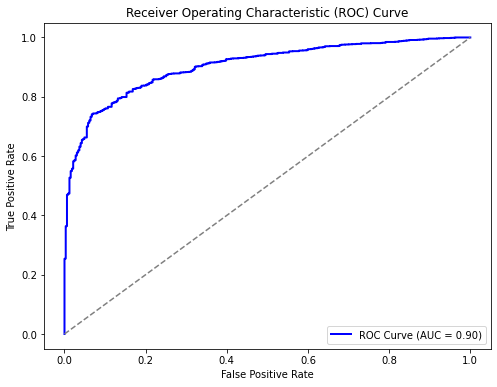

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

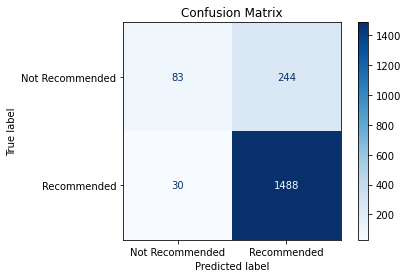

In [ ]:


# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Not Recommended', 'Recommended'], cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import spacy en

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to extract POS tags and named entities
def extract_pos_ner(text):
    doc = nlp(text)
    pos_tags = [token.pos_ for token in doc]  # Part-of-speech tags
    entities = [ent.label_ for ent in doc.ents]  # Named entities
    return {
        "pos_tags": " ".join(pos_tags),
        "entities": " ".join(entities)
    }

# Apply the function to the 'Review Text' column
df['POS Tags'] = df['Review Text'].apply(lambda x: extract_pos_ner(x)['pos_tags'])
df['Entities'] = df['Review Text'].apply(lambda x: extract_pos_ner(x)['entities'])

# Display the updated DataFrame
print(df[['Review Text', 'POS Tags', 'Entities']].head())

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
import joblib

# Save the trained pipeline to the root directory
joblib.dump(pipeline, '../trained_pipeline.pkl')

print("Pipeline saved successfully in the root directory as 'trained_pipeline.pkl'.")

SyntaxError: invalid syntax (Temp/ipykernel_172920/581980377.py, line 1)